In [ ]:
# citations 
# Rohit Kumar Thakur, August 30th, "Spotify Data Visualization and Analysis using Python" Source code, # https://medium.com/geekculture/spotify-data-visualization-and-analysis-using-python-4af81c5531a7
# Dae Bardhoshi, September 30th, "Music System", Source Code,  # https://github.com/DeaBardhoshi/Data-Science-Projects/blob/main/Music%20System.ipynb

In [ ]:
# access spotify to pull Ariana Grande music information
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time

client_id = 'd1414013bbbe4f0ab817aff5a66a6c13' # use our personal spotify information to get into spotify 
client_secret = '0bca3a94e7d94fe8b30bda97a68ab224'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

ids = getTrackIDs('Ragave Vic', '0At1809AzgSQXbraEONTRw?si=7defeb467b5e4957') # personal spotify account and playlist 

print(len(ids))
print(ids)


def getTrackFeatures(id): # get properities/variables for data features 
  meta = sp.track(id)
  features = sp.audio_features(id)

  # make variables for the properities 
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # account for all features/properities of songs 
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']

  track = [name, album, artist, release_date, length, popularity, danceability, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
  return track

# loop over the track ids 
tracks = []
for i in range(len(ids)):
  time.sleep(.5)
  track = getTrackFeatures(ids[i])
  tracks.append(track)

# create dataset
df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
df.to_csv("spotify.csv", sep = ',')


ModuleNotFoundError: ignored

In [ ]:
# import pandas and matplotlib to analzye and visualize the daya
import pandas as pd
from matplotlib import pyplot as plt

data= pd.read_csv("arianagrande_spotify.csv") # open .cvs file on python
data # show data 

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,shut up,Positions (Deluxe),Ariana Grande,2021-02-19,157710,58,0.499,0.8010,0.499,0.462,0.000000,0.0946,-5.308,0.0312,127.698,4
1,1,34+35,Positions (Deluxe),Ariana Grande,2021-02-19,173710,60,0.830,0.2370,0.830,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4
2,2,motive (with Doja Cat),Positions (Deluxe),Ariana Grande,2021-02-19,167989,63,0.789,0.0681,0.789,0.742,0.000000,0.1660,-5.664,0.0652,116.965,4
3,3,just like magic,Positions (Deluxe),Ariana Grande,2021-02-19,149900,59,0.719,0.0800,0.719,0.607,0.000000,0.1250,-5.156,0.1650,128.006,4
4,4,off the table (with The Weeknd),Positions (Deluxe),Ariana Grande,2021-02-19,239949,58,0.411,0.5190,0.411,0.522,0.000000,0.3980,-7.295,0.0981,88.332,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,The Way,Yours Truly,Ariana Grande,2013-01-01,227026,69,0.645,0.2940,0.645,0.878,0.000000,0.0760,-3.208,0.1130,82.324,4
86,86,You’ll Never Know,Yours Truly,Ariana Grande,2013-01-01,214280,52,0.764,0.0546,0.764,0.842,0.000000,0.0351,-3.835,0.0590,105.015,4
87,87,Almost Is Never Enough,Yours Truly,Ariana Grande,2013-01-01,327773,73,0.324,0.8250,0.324,0.327,0.000000,0.1010,-7.494,0.0409,81.328,4
88,88,Popular Song,Yours Truly,Ariana Grande,2013-01-01,200213,59,0.666,0.1520,0.666,0.810,0.000000,0.0613,-4.574,0.0458,99.023,4


In [ ]:
#name and view data frame
df_data = pd.DataFrame(data)
df_data

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,shut up,Positions (Deluxe),Ariana Grande,2021-02-19,157710,58,0.499,0.8010,0.499,0.462,0.000000,0.0946,-5.308,0.0312,127.698,4
1,1,34+35,Positions (Deluxe),Ariana Grande,2021-02-19,173710,60,0.830,0.2370,0.830,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4
2,2,motive (with Doja Cat),Positions (Deluxe),Ariana Grande,2021-02-19,167989,63,0.789,0.0681,0.789,0.742,0.000000,0.1660,-5.664,0.0652,116.965,4
3,3,just like magic,Positions (Deluxe),Ariana Grande,2021-02-19,149900,59,0.719,0.0800,0.719,0.607,0.000000,0.1250,-5.156,0.1650,128.006,4
4,4,off the table (with The Weeknd),Positions (Deluxe),Ariana Grande,2021-02-19,239949,58,0.411,0.5190,0.411,0.522,0.000000,0.3980,-7.295,0.0981,88.332,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,The Way,Yours Truly,Ariana Grande,2013-01-01,227026,69,0.645,0.2940,0.645,0.878,0.000000,0.0760,-3.208,0.1130,82.324,4
86,86,You’ll Never Know,Yours Truly,Ariana Grande,2013-01-01,214280,52,0.764,0.0546,0.764,0.842,0.000000,0.0351,-3.835,0.0590,105.015,4
87,87,Almost Is Never Enough,Yours Truly,Ariana Grande,2013-01-01,327773,73,0.324,0.8250,0.324,0.327,0.000000,0.1010,-7.494,0.0409,81.328,4
88,88,Popular Song,Yours Truly,Ariana Grande,2013-01-01,200213,59,0.666,0.1520,0.666,0.810,0.000000,0.0613,-4.574,0.0458,99.023,4


In [ ]:
# start cleaning the data 
sorted_df = df_data.sort_values('popularity', ascending = False).head(100) # sort data by least to most popularity to clean the data
sorted_two_df = df_data.sort_values('popularity', ascending = True) # return true when when it is sorted by popularity 
date = list(df_data.release_date) # dataframe will be sorted from oldest release date to latest 
for i in range(len(date)):
    date[i] = int(date[i][:4])
sorted_two_df

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
89,89,Better Left Unsaid,Yours Truly,Ariana Grande,2013-01-01,211226,48,0.594,0.0397,0.594,0.830,0.000145,0.1040,-4.024,0.0328,129.998,4
82,82,Lovin' It,Yours Truly,Ariana Grande,2013-01-01,180693,50,0.624,0.1150,0.624,0.825,0.000000,0.2760,-3.841,0.0422,93.996,4
62,62,Jason's Song (Gave It Away),Dangerous Woman,Ariana Grande,2016-05-20,264640,50,0.650,0.4500,0.650,0.655,0.000031,0.0730,-4.307,0.0631,105.950,4
86,86,You’ll Never Know,Yours Truly,Ariana Grande,2013-01-01,214280,52,0.764,0.0546,0.764,0.842,0.000000,0.0351,-3.835,0.0590,105.015,4
63,63,Intro,My Everything (Deluxe),Ariana Grande,2014-08-25,79840,52,0.447,0.9690,0.447,0.182,0.000038,0.3270,-12.439,0.0324,89.814,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,40,no tears left to cry,Sweetener,Ariana Grande,2018-08-17,205920,80,0.699,0.0400,0.699,0.713,0.000003,0.2940,-5.507,0.0594,121.993,4
65,65,One Last Time,My Everything (Deluxe),Ariana Grande,2014-08-25,197266,80,0.628,0.0930,0.628,0.593,0.000002,0.0960,-5.036,0.0323,125.026,4
35,35,God is a woman,Sweetener,Ariana Grande,2018-08-17,197546,81,0.602,0.0233,0.602,0.658,0.000060,0.2370,-5.934,0.0558,145.031,4
29,29,"thank u, next","thank u, next",Ariana Grande,2019-02-08,207320,84,0.717,0.2290,0.717,0.653,0.000000,0.1010,-5.634,0.0658,106.966,4


In [ ]:
df_data['Year'] = date # sort by newest to oldest to clean the data
df_data

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,Year
0,0,shut up,Positions (Deluxe),Ariana Grande,2021-02-19,157710,58,0.499,0.8010,0.499,0.462,0.000000,0.0946,-5.308,0.0312,127.698,4,2021
1,1,34+35,Positions (Deluxe),Ariana Grande,2021-02-19,173710,60,0.830,0.2370,0.830,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4,2021
2,2,motive (with Doja Cat),Positions (Deluxe),Ariana Grande,2021-02-19,167989,63,0.789,0.0681,0.789,0.742,0.000000,0.1660,-5.664,0.0652,116.965,4,2021
3,3,just like magic,Positions (Deluxe),Ariana Grande,2021-02-19,149900,59,0.719,0.0800,0.719,0.607,0.000000,0.1250,-5.156,0.1650,128.006,4,2021
4,4,off the table (with The Weeknd),Positions (Deluxe),Ariana Grande,2021-02-19,239949,58,0.411,0.5190,0.411,0.522,0.000000,0.3980,-7.295,0.0981,88.332,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,The Way,Yours Truly,Ariana Grande,2013-01-01,227026,69,0.645,0.2940,0.645,0.878,0.000000,0.0760,-3.208,0.1130,82.324,4,2013
86,86,You’ll Never Know,Yours Truly,Ariana Grande,2013-01-01,214280,52,0.764,0.0546,0.764,0.842,0.000000,0.0351,-3.835,0.0590,105.015,4,2013
87,87,Almost Is Never Enough,Yours Truly,Ariana Grande,2013-01-01,327773,73,0.324,0.8250,0.324,0.327,0.000000,0.1010,-7.494,0.0409,81.328,4,2013
88,88,Popular Song,Yours Truly,Ariana Grande,2013-01-01,200213,59,0.666,0.1520,0.666,0.810,0.000000,0.0613,-4.574,0.0458,99.023,4,2013


In [ ]:
df_pre90 = df_data[df_data.Year <= 1990] # sort by release date 
df_post_90 = df_data[df_data.Year > 1990]
df_data

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,Year
0,0,shut up,Positions (Deluxe),Ariana Grande,2021-02-19,157710,58,0.499,0.8010,0.499,0.462,0.000000,0.0946,-5.308,0.0312,127.698,4,2021
1,1,34+35,Positions (Deluxe),Ariana Grande,2021-02-19,173710,60,0.830,0.2370,0.830,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4,2021
2,2,motive (with Doja Cat),Positions (Deluxe),Ariana Grande,2021-02-19,167989,63,0.789,0.0681,0.789,0.742,0.000000,0.1660,-5.664,0.0652,116.965,4,2021
3,3,just like magic,Positions (Deluxe),Ariana Grande,2021-02-19,149900,59,0.719,0.0800,0.719,0.607,0.000000,0.1250,-5.156,0.1650,128.006,4,2021
4,4,off the table (with The Weeknd),Positions (Deluxe),Ariana Grande,2021-02-19,239949,58,0.411,0.5190,0.411,0.522,0.000000,0.3980,-7.295,0.0981,88.332,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,The Way,Yours Truly,Ariana Grande,2013-01-01,227026,69,0.645,0.2940,0.645,0.878,0.000000,0.0760,-3.208,0.1130,82.324,4,2013
86,86,You’ll Never Know,Yours Truly,Ariana Grande,2013-01-01,214280,52,0.764,0.0546,0.764,0.842,0.000000,0.0351,-3.835,0.0590,105.015,4,2013
87,87,Almost Is Never Enough,Yours Truly,Ariana Grande,2013-01-01,327773,73,0.324,0.8250,0.324,0.327,0.000000,0.1010,-7.494,0.0409,81.328,4,2013
88,88,Popular Song,Yours Truly,Ariana Grande,2013-01-01,200213,59,0.666,0.1520,0.666,0.810,0.000000,0.0613,-4.574,0.0458,99.023,4,2013


In [ ]:
sorted_df.head() # check if its sorted 

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
28,28,7 rings,"thank u, next",Ariana Grande,2019-02-08,178626,86,0.778,0.5920,0.778,0.317,0.000000,0.0881,-10.732,0.3340,140.048,4
29,29,"thank u, next","thank u, next",Ariana Grande,2019-02-08,207320,84,0.717,0.2290,0.717,0.653,0.000000,0.1010,-5.634,0.0658,106.966,4
35,35,God is a woman,Sweetener,Ariana Grande,2018-08-17,197546,81,0.602,0.0233,0.602,0.658,0.000060,0.2370,-5.934,0.0558,145.031,4
65,65,One Last Time,My Everything (Deluxe),Ariana Grande,2014-08-25,197266,80,0.628,0.0930,0.628,0.593,0.000002,0.0960,-5.036,0.0323,125.026,4
40,40,no tears left to cry,Sweetener,Ariana Grande,2018-08-17,205920,80,0.699,0.0400,0.699,0.713,0.000003,0.2940,-5.507,0.0594,121.993,4


In [ ]:
sorted_df['length'].value_counts().index.unique() # sort the index to clean the data

Int64Index([129080, 178026, 172324, 182437, 214880, 211880, 196360, 197546,
            339733, 299213, 229680, 264640, 253386, 180693, 171573, 132278,
            214840, 227386, 216893, 122174, 146958, 245666, 260000, 226173,
            212266, 217053, 233733, 179860,  37640, 232586, 200386, 149900,
            247080, 173710, 235946, 198160, 197266, 193986, 140693, 199320,
            223880, 201882, 194706, 200732, 179293, 178626, 157710, 177533,
            167989, 236133, 211226, 226666, 190440, 214280, 271466, 228373,
            208493, 208880, 182000, 244440, 183874, 180853, 202360, 124281,
            226426, 194840, 192226, 211293, 222946, 234426,  79840, 171333,
             76742, 168520, 208457, 172106, 239949, 227026, 233720,  73813,
            205920, 200213, 322026, 207320, 197600, 189506, 327773, 158436,
            267106, 193920],
           dtype='int64')

In [ ]:
print(max(sorted_df['length'].value_counts().index.unique()), min(sorted_df['length'].value_counts().index.unique()))

339733 37640


In [ ]:
def minutes_seconds(x): # change miliseconds into minutes and seconds 
    to_seconds = x/1000
    to_minutes = to_seconds/60
    return to_minutes # return length in minutes instead of miliseconds 

sorted_df['duration_minutes'] = sorted_df['length'].map(minutes_seconds) # sort by minutes 
sorted_df.head() 

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,duration_minutes
28,28,7 rings,"thank u, next",Ariana Grande,2019-02-08,178626,86,0.778,0.5920,0.778,0.317,0.000000,0.0881,-10.732,0.3340,140.048,4,2.977100
29,29,"thank u, next","thank u, next",Ariana Grande,2019-02-08,207320,84,0.717,0.2290,0.717,0.653,0.000000,0.1010,-5.634,0.0658,106.966,4,3.455333
35,35,God is a woman,Sweetener,Ariana Grande,2018-08-17,197546,81,0.602,0.0233,0.602,0.658,0.000060,0.2370,-5.934,0.0558,145.031,4,3.292433
65,65,One Last Time,My Everything (Deluxe),Ariana Grande,2014-08-25,197266,80,0.628,0.0930,0.628,0.593,0.000002,0.0960,-5.036,0.0323,125.026,4,3.287767
40,40,no tears left to cry,Sweetener,Ariana Grande,2018-08-17,205920,80,0.699,0.0400,0.699,0.713,0.000003,0.2940,-5.507,0.0594,121.993,4,3.432000


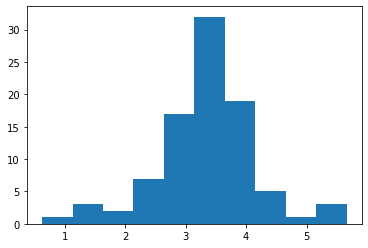

In [ ]:
plt.hist(sorted_df['duration_minutes']);

In [ ]:
sorted_df['time_signature'].value_counts().index.unique()

Int64Index([4, 3, 5, 1], dtype='int64')

In [ ]:
sorted_df.columns

Index(['Unnamed: 0', 'name', 'album', 'artist', 'release_date', 'length',
       'popularity', 'danceability', 'acousticness', 'danceability.1',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'time_signature', 'duration_minutes'],
      dtype='object')

In [ ]:
sorted_df['energy'].unique()

array([0.317, 0.653, 0.658, 0.593, 0.713, 0.554, 0.714, 0.702, 0.805,
       0.656, 0.309, 0.327, 0.454, 0.6  , 0.475, 0.708, 0.665, 0.579,
       0.614, 0.485, 0.458, 0.364, 0.662, 0.619, 0.796, 0.878, 0.459,
       0.603, 0.265, 0.524, 0.231, 0.322, 0.578, 0.734, 0.667, 0.602,
       0.723, 0.456, 0.449, 0.547, 0.31 , 0.747, 0.742, 0.663, 0.877,
       0.519, 0.608, 0.802, 0.435, 0.694, 0.534, 0.585, 0.544, 0.804,
       0.818, 0.599, 0.733, 0.81 , 0.586, 0.607, 0.506, 0.605, 0.462,
       0.412, 0.446, 0.672, 0.522, 0.704, 0.526, 0.381, 0.666, 0.842,
       0.759, 0.834, 0.573, 0.516, 0.455, 0.645, 0.648, 0.766, 0.696,
       0.631, 0.403, 0.182, 0.825, 0.655, 0.83 ])

In [ ]:
sorted_df['artist'][:10]

28    Ariana Grande
29    Ariana Grande
35    Ariana Grande
65    Ariana Grande
40    Ariana Grande
30    Ariana Grande
71    Ariana Grande
67    Ariana Grande
64    Ariana Grande
39    Ariana Grande
Name: artist, dtype: object

In [ ]:
sorted_df['artist'].unique()

array(['Ariana Grande'], dtype=object)

In [ ]:
sorted_df['danceability'].unique()

array([0.778, 0.717, 0.602, 0.628, 0.699, 0.726, 0.472, 0.687, 0.66 ,
       0.568, 0.647, 0.324, 0.708, 0.662, 0.729, 0.698, 0.758, 0.847,
       0.71 , 0.831, 0.747, 0.287, 0.659, 0.45 , 0.724, 0.645, 0.721,
       0.54 , 0.597, 0.671, 0.336, 0.439, 0.654, 0.623, 0.664, 0.644,
       0.813, 0.604, 0.877, 0.652, 0.703, 0.789, 0.734, 0.443, 0.535,
       0.692, 0.737, 0.527, 0.536, 0.487, 0.83 , 0.639, 0.738, 0.761,
       0.552, 0.637, 0.666, 0.622, 0.719, 0.772, 0.499, 0.633, 0.445,
       0.624, 0.411, 0.59 , 0.686, 0.484, 0.397, 0.656, 0.795, 0.621,
       0.688, 0.739, 0.675, 0.507, 0.381, 0.591, 0.764, 0.447, 0.65 ,
       0.594])

In [ ]:
sorted_df.groupby(['name']).size().sort_values(ascending = False)

name
worst behavior                     1
Intro                              1
Just A Little Bit Of Your Heart    1
Knew Better / Forever Boy          1
Leave Me Lonely                    1
                                  ..
goodnight n go                     1
imagine                            1
in my head                         1
just like magic                    1
34+35                              1
Length: 90, dtype: int64

In [ ]:
sorted_df[sorted_df['name'] == 'worst behavior']

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,duration_minutes
17,17,worst behavior,Positions (Deluxe),Ariana Grande,2021-02-19,124281,65,0.726,0.37,0.726,0.667,0.0,0.118,-5.956,0.0617,100.053,4,2.07135


In [ ]:
len(sorted_df['name'].unique()) == len(sorted_df['name']) # check if all songs are unique, true means yes 

True

In [ ]:
import seaborn as sns

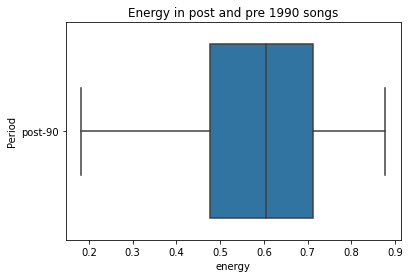

In [ ]:
df_data['Period'] = df_data['Year'].map(lambda x: 'pre-90' if x<1990 else 'post-90')
sns.boxplot(x="energy", y="Period", data=df_data)
plt.title('Energy in post and pre 1990 songs');

In [ ]:
# import numpy and pandas to determine analytics information 
import numpy as np
import pandas as pd
import scipy.stats as stats
# import seaborn and matplotlib for data visualization 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly 
import plotly.express as px
% matplotlib inline

In [ ]:
df = pd.read_csv("arianagrande_spotify.csv", encoding='latin-1') # read python file 
df.head()

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,shut up,Positions (Deluxe),Ariana Grande,2021-02-19,157710,58,0.499,0.8010,0.499,0.462,0.0,0.0946,-5.308,0.0312,127.698,4
1,1,34+35,Positions (Deluxe),Ariana Grande,2021-02-19,173710,60,0.830,0.2370,0.830,0.585,0.0,0.2480,-6.476,0.0940,109.978,4
2,2,motive (with Doja Cat),Positions (Deluxe),Ariana Grande,2021-02-19,167989,63,0.789,0.0681,0.789,0.742,0.0,0.1660,-5.664,0.0652,116.965,4
3,3,just like magic,Positions (Deluxe),Ariana Grande,2021-02-19,149900,59,0.719,0.0800,0.719,0.607,0.0,0.1250,-5.156,0.1650,128.006,4
4,4,off the table (with The Weeknd),Positions (Deluxe),Ariana Grande,2021-02-19,239949,58,0.411,0.5190,0.411,0.522,0.0,0.3980,-7.295,0.0981,88.332,1


In [ ]:
#data info
df.info()
#Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        90 non-null     int64  
 1   name              90 non-null     object 
 2   album             90 non-null     object 
 3   artist            90 non-null     object 
 4   release_date      90 non-null     object 
 5   length            90 non-null     int64  
 6   popularity        90 non-null     int64  
 7   danceability      90 non-null     float64
 8   acousticness      90 non-null     float64
 9   danceability.1    90 non-null     float64
 10  energy            90 non-null     float64
 11  instrumentalness  90 non-null     float64
 12  liveness          90 non-null     float64
 13  loudness          90 non-null     float64
 14  speechiness       90 non-null     float64
 15  tempo             90 non-null     float64
 16  time_signature    90 non-null     int64  
dtyp

Unnamed: 0          0
name                0
album               0
artist              0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
danceability.1      0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [ ]:
#check number of times charted by artist
df_numbercharted=df.groupby('artist').sum().sort_values('popularity', ascending=False)
df_numbercharted=df_numbercharted.reset_index()
df_numbercharted

,artist,Unnamed: 0,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Ariana Grande,4005,18063003,5741,57.427,21.94027,57.427,53.728,0.056123,15.4769,-541.529,8.3907,10309.851,351


In [ ]:
px.bar(x='popularity', y='danceability', data_frame=df_numbercharted.head(7), title="Ariana Grande Popularity")

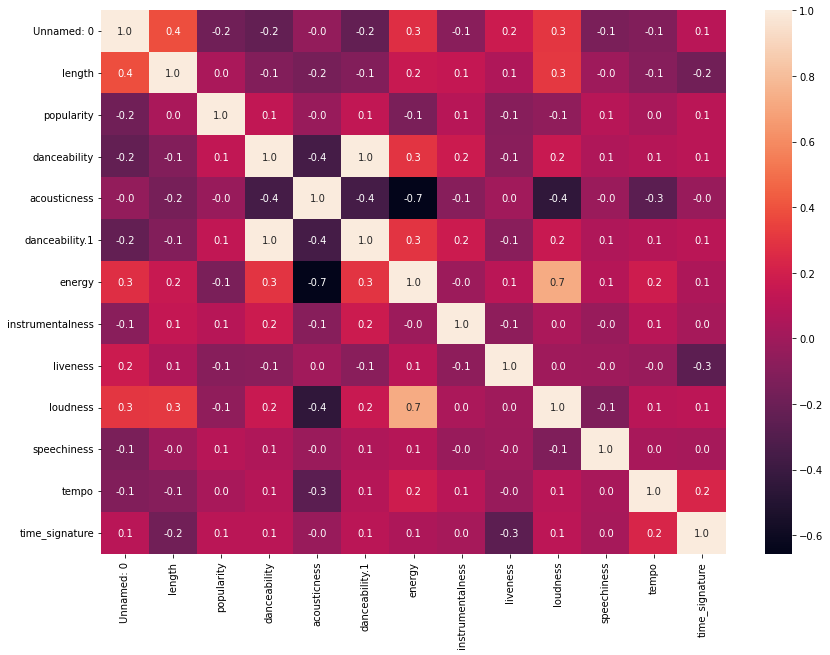

In [ ]:
%matplotlib inline # create heat map for different properies and variables 
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(),annot = True,fmt = ".1f",ax = ax)
plt.show()

In [ ]:
# make line graph with correlations between popularity and dancability 
px.line(x='popularity', y='danceability', data_frame=df, title="Correlation between Popularity and Danceability")

In [ ]:
# make line graph with correlations between dancability over the years 
px.line(x='release_date', y='popularity', data_frame=df, title="Danceability over the course of the Years")

In [ ]:
# sort 
dfyear = df.groupby('release_date').sum().sort_values('popularity', ascending=False)
dfyear=dfyear.reset_index()


,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,shut up,Positions (Deluxe),Ariana Grande,2021-02-19,157710,58,0.499,0.8010,0.499,0.462,0.000000,0.0946,-5.308,0.0312,127.698,4
1,1,34+35,Positions (Deluxe),Ariana Grande,2021-02-19,173710,60,0.830,0.2370,0.830,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4
2,2,motive (with Doja Cat),Positions (Deluxe),Ariana Grande,2021-02-19,167989,63,0.789,0.0681,0.789,0.742,0.000000,0.1660,-5.664,0.0652,116.965,4
3,3,just like magic,Positions (Deluxe),Ariana Grande,2021-02-19,149900,59,0.719,0.0800,0.719,0.607,0.000000,0.1250,-5.156,0.1650,128.006,4
4,4,off the table (with The Weeknd),Positions (Deluxe),Ariana Grande,2021-02-19,239949,58,0.411,0.5190,0.411,0.522,0.000000,0.3980,-7.295,0.0981,88.332,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,The Way,Yours Truly,Ariana Grande,2013-01-01,227026,69,0.645,0.2940,0.645,0.878,0.000000,0.0760,-3.208,0.1130,82.324,4
86,86,Youâll Never Know,Yours Truly,Ariana Grande,2013-01-01,214280,52,0.764,0.0546,0.764,0.842,0.000000,0.0351,-3.835,0.0590,105.015,4
87,87,Almost Is Never Enough,Yours Truly,Ariana Grande,2013-01-01,327773,73,0.324,0.8250,0.324,0.327,0.000000,0.1010,-7.494,0.0409,81.328,4
88,88,Popular Song,Yours Truly,Ariana Grande,2013-01-01,200213,59,0.666,0.1520,0.666,0.810,0.000000,0.0613,-4.574,0.0458,99.023,4


In [ ]:
px.bar(x='release_date', y='popularity', data_frame=dfyear.head(7))

In [ ]:
artistbypop = df.groupby('album').sum().sort_values('popularity' ,ascending=False)[:20]
artistbypop=artistbypop.reset_index()
#plot the graph
px.bar(x='album', y='popularity', data_frame=artistbypop, title="Ariana Grande's Most Popular Albums")


In [ ]:
# make a bar graph for Ariana Grande's most popular songs 
artistbypop = df.groupby('name').sum().sort_values('popularity' ,ascending=False)[:20]
artistbypop=artistbypop.reset_index()

px.bar(x='name', y='popularity', data_frame=artistbypop, title="Ariana Grande's Most Popular Songs")


In [ ]:
# make a bar graph for Ariana Grande's Most Danceable Songs
artistbypop = df.groupby('name').sum().sort_values('danceability' ,ascending=False)[:20]
artistbypop=artistbypop.reset_index()

px.bar(x='name', y='danceability', data_frame=artistbypop, title="Ariana Grande's Most Danceable Songs")


In [ ]:
# make a bar graph for Ariana Grande's Most Acoustic Songs
artistbypop = df.groupby('name').sum().sort_values('acousticness' ,ascending=False)[:20]
artistbypop=artistbypop.reset_index()

px.bar(x='name', y='acousticness', data_frame=artistbypop, title="Ariana Grande's Most Acoustic Songs")


In [ ]:
# make a bar graph for Ariana Grande's Most Energetic Songs
artistbypop = df.groupby('name').sum().sort_values('energy' ,ascending=False)[:20]
artistbypop=artistbypop.reset_index()

px.bar(x='name', y='energy', data_frame=artistbypop, title="Ariana Grande's Most Energetic Songs")

In [ ]:
# make a bar graph for Ariana Grande's showing the Correlation Between Ariana Grande's Most Popular Songs and Their Release date
artistbypop = df.groupby('release_date').sum().sort_values('popularity' ,ascending=False)[:20]
artistbypop=artistbypop.reset_index()

px.bar(x='release_date', y='popularity', data_frame=artistbypop, title="Correlation Between Ariana Grande's Most Popular Songs and Their Release date")

In [ ]:
# make a bar graph for Ariana Grande's Most Most Danceable Albums
artistbypop = df.groupby('album').sum().sort_values('danceability' ,ascending=False)[:20] # determine most dancabile albums 
artistbypop=artistbypop.reset_index()

px.bar(x='album', y='danceability', data_frame=artistbypop, title="Ariana Grande's Most Danceable Albums")

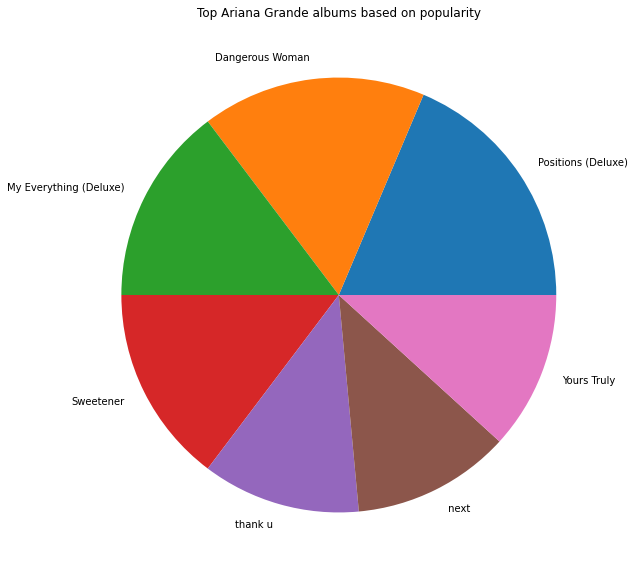

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = fig.subplots()
df.album.value_counts()[:30].plot(ax=ax, kind = "pie")
ax.set_ylabel("")
ax.set_title("Top Ariana Grande albums based on popularity")
plt.show()